### 01. Import Dependecies

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

### 02. Data Loading

In [5]:
df = pd.read_csv('data/processed/feature_engineered.csv')
df.head()

,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level,Like_Rate,Share_Rate,Comment_Rate,Total_Engagement,Engagement_Rate,Total_Engagement_wo_Shares,Engagement_Rate_wo_Shares,Views_norm
0,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High,0.081526,0.012762,0.004647,411912,0.098935,358777,0.086173,1.571570
1,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium,0.051791,0.015847,0.006554,308339,0.074192,242479,0.058345,1.622473
2,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium,0.089232,0.010753,0.009880,402789,0.109865,363366,0.099112,1.383053
3,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low,0.138488,0.012732,0.040096,175618,0.191315,163931,0.178584,0.347293
4,Instagram,#Challenge,Shorts,Australia,1323566,136282,86979,47129,Low,0.102966,0.065716,0.035608,270390,0.204289,183411,0.138573,0.516718


In [6]:
df.nunique()

Platform                         4
Hashtag                         10
Content_Type                     6
Region                           8
Views                         4726
Likes                         4705
Shares                        4612
Comments                      4490
Engagement_Level                 3
Like_Rate                     4730
Share_Rate                    4730
Comment_Rate                  4730
Total_Engagement              4704
Engagement_Rate               4730
Total_Engagement_wo_Shares    4711
Engagement_Rate_wo_Shares     4730
Views_norm                    4729
dtype: int64

In [7]:
numerical_columns = [
    'Views','Likes','Shares','Comments',
    'Like_Rate','Share_Rate','Comment_Rate',
    'Total_Engagement','Engagement_Rate','Total_Engagement_wo_Shares',
    'Engagement_Rate_wo_Shares','Views_norm'
]


### 03. Data Visualization

#### 3.1 Correlation Patterns

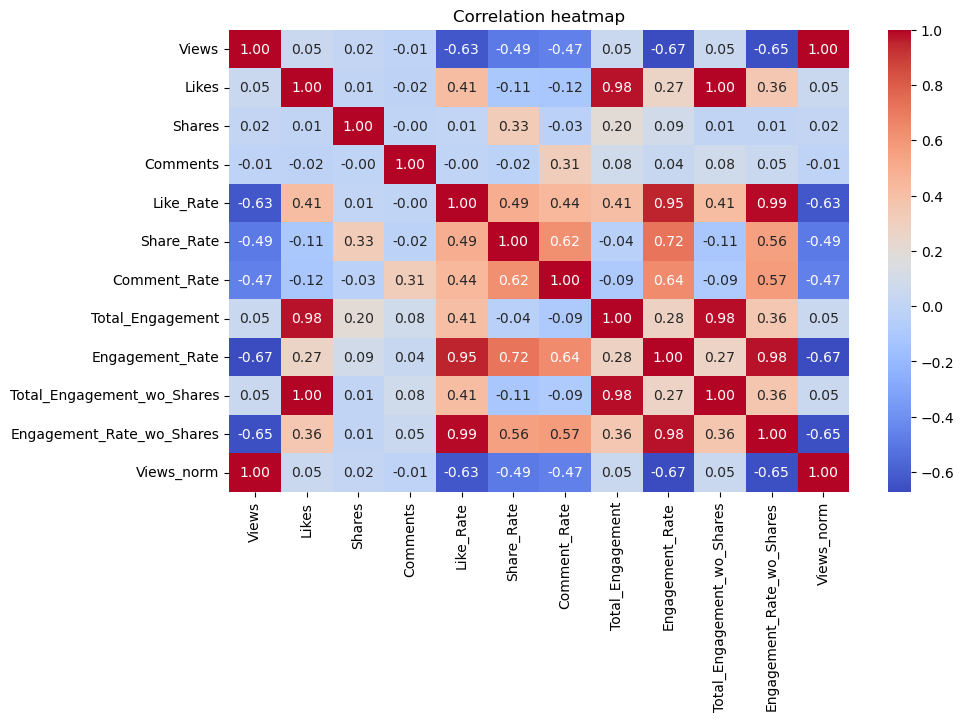

In [8]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation heatmap")
plt.savefig('figures/correlation_pattern.jpg')
plt.show()

##### 3.1.1 statistical tests

In [9]:
for col in numerical_columns:
    print(f"\n--------------- {col} vs Other Metrics -----------------\n")
    for col2 in numerical_columns:
        corr, p_value = pearsonr(df[col], df[col2])
        significance = 'Correlated' if p_value < 0.05 else 'No correlation'
        print(f"{col2:10} | Correlation: {corr:.3f} | p-value: {p_value:.4f} | {significance}")



--------------- Views vs Other Metrics -----------------

Views      | Correlation: 1.000 | p-value: 0.0000 | Correlated
Likes      | Correlation: 0.050 | p-value: 0.0006 | Correlated
Shares     | Correlation: 0.017 | p-value: 0.2530 | No correlation
Comments   | Correlation: -0.007 | p-value: 0.6529 | No correlation
Like_Rate  | Correlation: -0.628 | p-value: 0.0000 | Correlated
Share_Rate | Correlation: -0.494 | p-value: 0.0000 | Correlated
Comment_Rate | Correlation: -0.468 | p-value: 0.0000 | Correlated
Total_Engagement | Correlation: 0.051 | p-value: 0.0004 | Correlated
Engagement_Rate | Correlation: -0.671 | p-value: 0.0000 | Correlated
Total_Engagement_wo_Shares | Correlation: 0.049 | p-value: 0.0008 | Correlated
Engagement_Rate_wo_Shares | Correlation: -0.653 | p-value: 0.0000 | Correlated
Views_norm | Correlation: 1.000 | p-value: 0.0000 | Correlated

--------------- Likes vs Other Metrics -----------------

Views      | Correlation: 0.050 | p-value: 0.0006 | Correlated
Likes

##### According to the result of heatmap Views, Likes, Shares, and Comments are essentially independent of each other.

#### 3.2 Distribution Plots

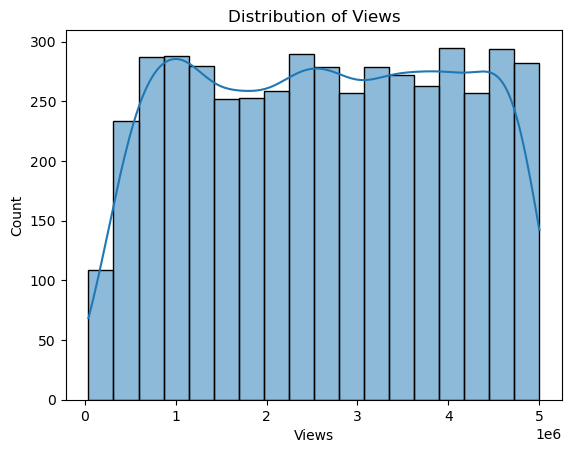

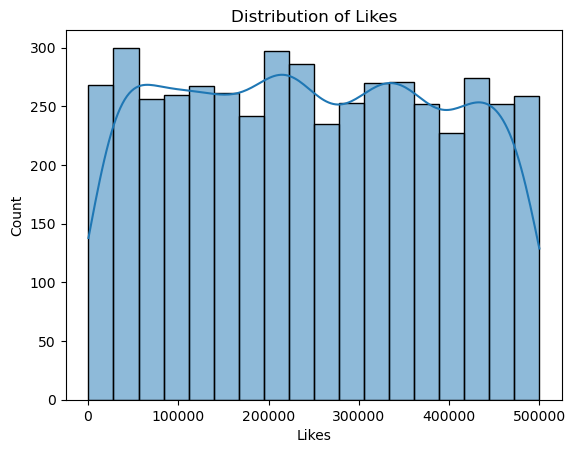

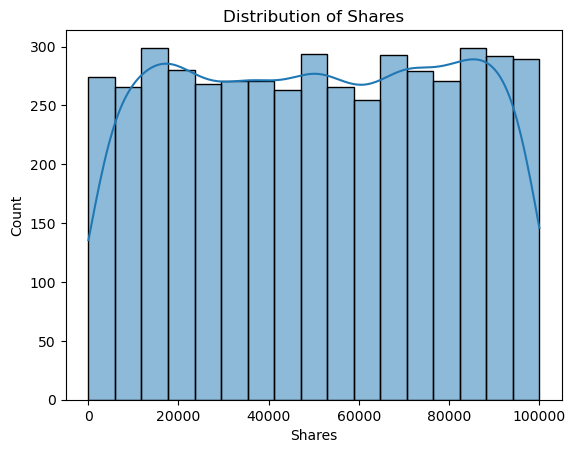

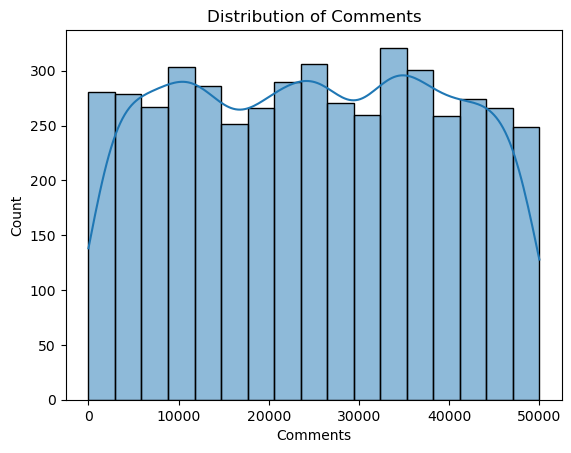

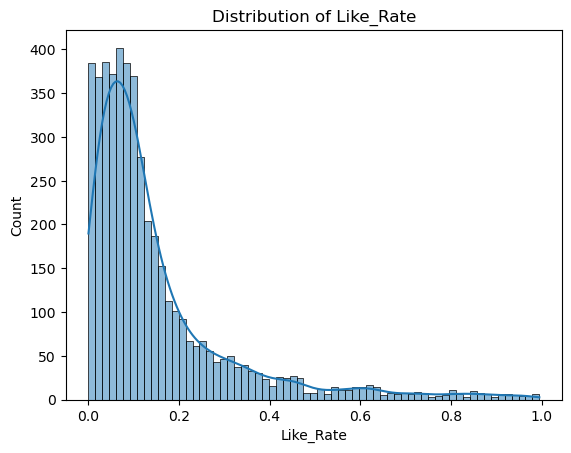

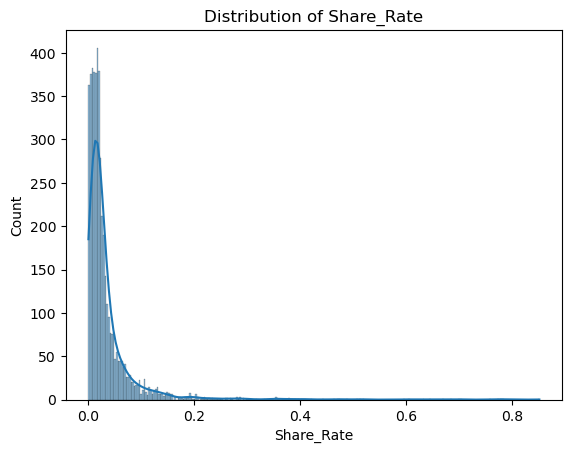

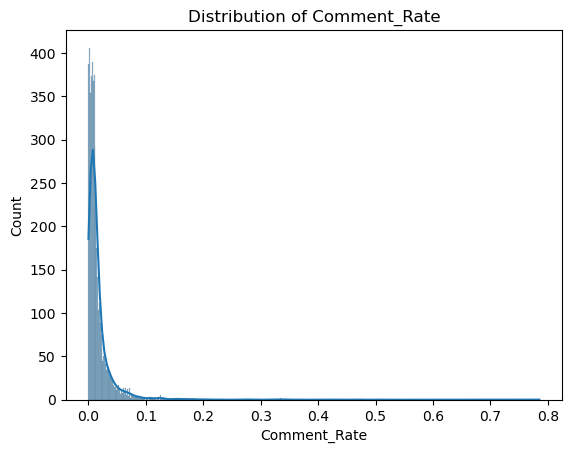

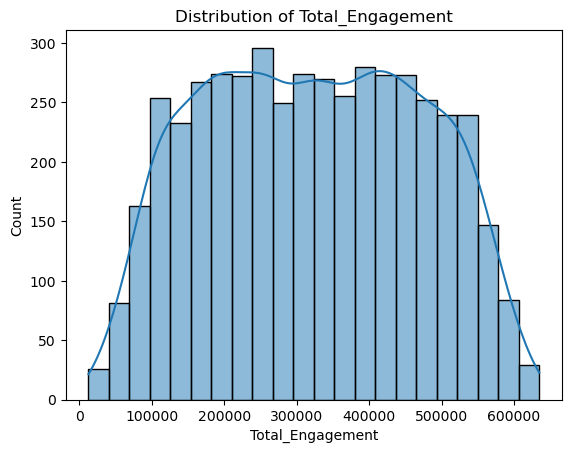

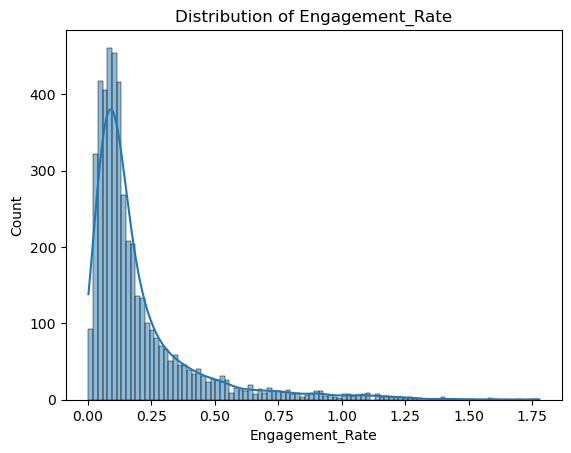

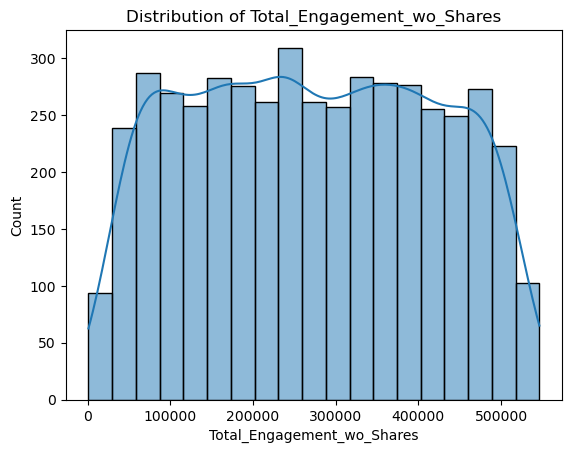

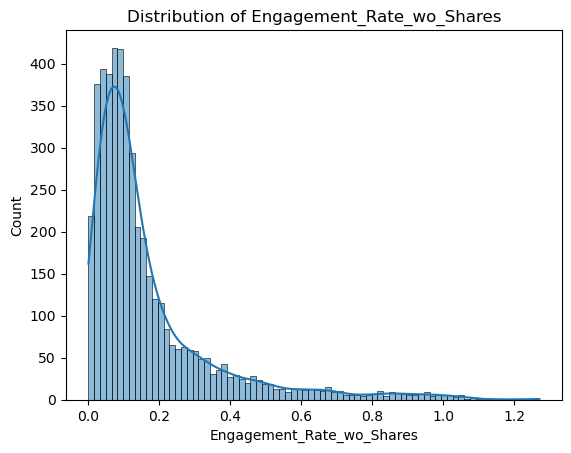

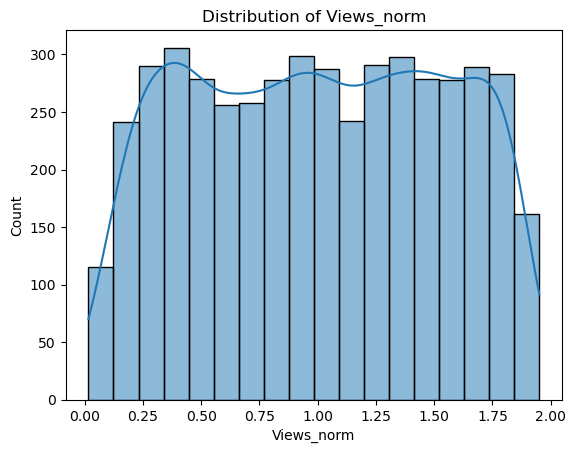

In [10]:
for col in numerical_columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.savefig(f'figures/distribution_plots/distribution_of_{col}.jpg')
    plt.show()

#### 3.3 Scatter Plots

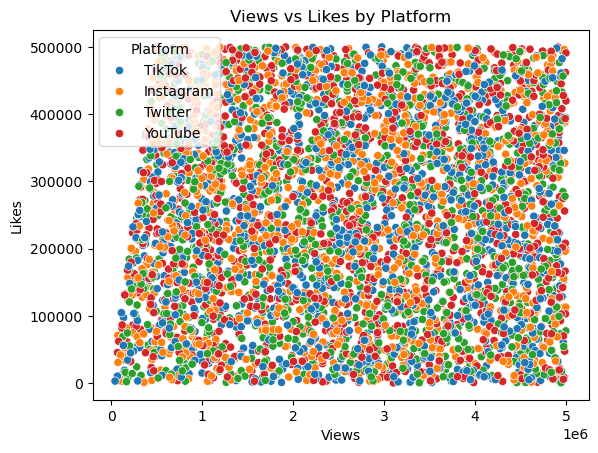

In [11]:
sns.scatterplot(x='Views', y='Likes', hue='Platform', data=df)
plt.title('Views vs Likes by Platform')
plt.savefig('figures/scatter_plots.jpg')
plt.show()

##### There is no relationship between Views and Likes — across all platforms. Most posts get views without likes. A few get both. Platform doesn’t change the story

#### 3.4 Bar Chart (Performance Across Platforms)

In [12]:
platform_avg = df.groupby('Platform')[['Views','Likes','Shares','Comments']].mean().reset_index()

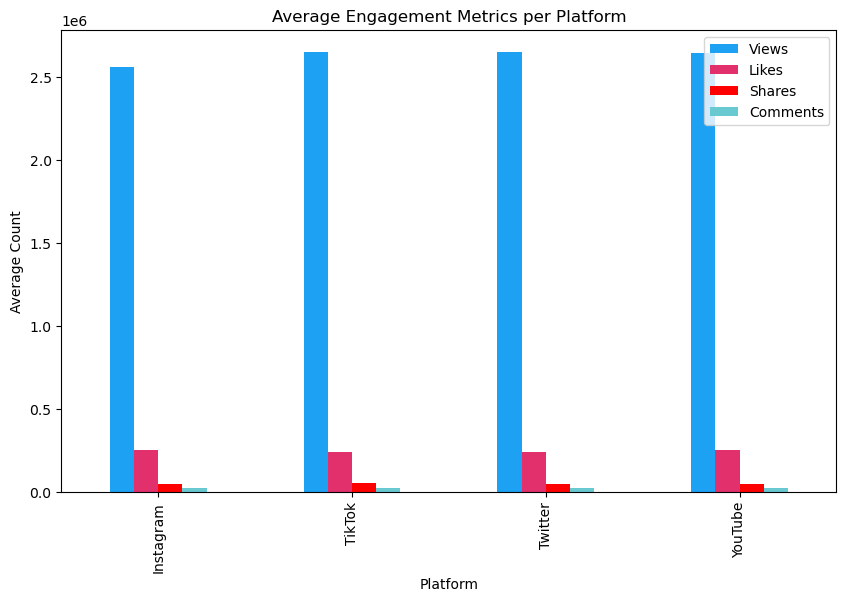

In [13]:
platform_avg.plot(x='Platform', kind='bar', figsize=(10,6), color=['#1DA1F2','#E1306C','#FF0000','#69C9D0'])
plt.title('Average Engagement Metrics per Platform')
plt.ylabel('Average Count')
plt.savefig('figures/bar_chart.jpg')
plt.show()